In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we investigate the non-ergodicity of the multiplicative growth of wealth. The general model we consider is the following:

$$ W_n = W_0 \prod_{i = 1}^n r_i\,, $$

where $r_i$ is some random multiplicative factor. The $r_i$'s are assumed to be independent and identically distributed. For the sake of concreteness, we will take $r_i = 1.5$ or $r_i = 0.6$, each with  with probability $\frac{1}{2}$.  The question is, should you play a game with this setup?

The naive answer is yes. Taking the expectation of both sides of our expression for $W_n$, and using the independence of each multiple, we get $E[W_n] = W_0 (1.05)^n$, which is clearly greater than $1$ for any $n>0$, indicating a profit.

However, let's consider a typical realization of this game below.

In [16]:
p_up = 0.5 
p_down = 0.5
r_up = 1.5
r_down = 0.6

In [31]:
ev_r = p_up*r_up + p_down*r_down
asymp_mean = p_up*np.log(r_up) + p_down*np.log(r_down)

In [18]:
def simulation(n_samples, n_steps, p_up, p_down, r_up, r_down):
    
    sequences = np.random.choice([r_up, r_down], size=(n_samples, n_steps))
    
    # Set the first element of each row to 1
    paths = np.ones((n_samples, n_steps+1))
    paths[:, 1:] = sequences

    paths = np.cumprod(paths, axis=1)
    
    return paths

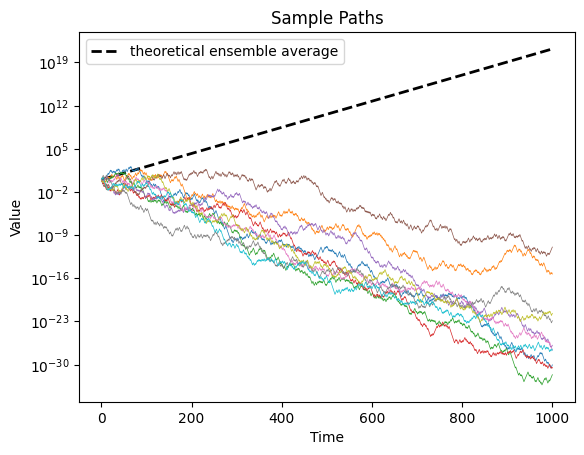

In [42]:
n_samples = 10
n_steps = 1000

paths = simulation(n_samples, n_steps, p_up, p_down, r_up, r_down)

plt.figure()

time = np.arange(1, n_steps+1)
ev_sequence = np.power(ev_r, time)

plt.plot(time, ev_sequence, linewidth=2, label=f'theoretical ensemble average', color='black', linestyle='--')

for row in paths:
    plt.plot(row, linewidth=0.5)

# Add labels and a legend
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sample Paths')
plt.legend()


# Show the plot
plt.show()

Looks like we shouldn't play this game. For any given path, the trajectory is clearly downward. However, if we simulate a large number of paths (e.g. 10^6) and take their average as in the plot below, we _do_ get convergence to the dashed black line.  However, the convergence is slow and not uniform.  We can see why this is the case in the plot above; the paths loosely cluster around the dashed line only up to maybe 75 steps, before diverging off to 0.

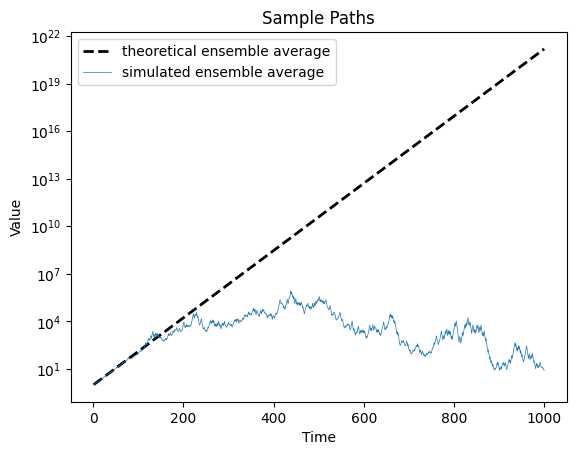

In [40]:
n_samples = 1_000_000
n_steps = 1000

paths = simulation(n_samples, n_steps, p_up, p_down, r_up, r_down)
avg_path = np.mean(paths, axis=0)

plt.figure()

time = np.arange(1, n_steps+1)
ev_sequence = np.power(ev_r, time)

plt.plot(time, ev_sequence, linewidth=2, label=f'theoretical ensemble average', color='black', linestyle='--')

plt.plot(avg_path, linewidth=0.5, label='simulated ensemble average')

# Add labels and a legend
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sample Paths')
plt.legend()


# Show the plot
plt.show()

Indeed, we can see some very slow convergence of the simulated ensemble mean to its theoretical trajectory.  So, back to the question at hand, if you can find one million people to play this game, and you are awarded their average of wealth at the end of ~150-200 iterations, you should do it. However, counterintuitively, we should apparently not do it if they play for one trillion iterations, since the realized ensemble path is still heading towards zero, albeit very slowly.  Put another way, the ensemble average of $W_n$ is capturing what would happen if we started with dollar, played n rounds, then started with another dollar, played another n rounds, etc., and averaged our results together. This is not a realistic or relevant scenario. We cannot repeat the universe in real life, and instead we follow just one realization, starting with just one dollar.  With this in mind, we should not play e.g. 1000 iterations of this game, because we will follow one of the sample paths heading to zero.

The discrepancy is due to the fact that $W_n$, and more generally a geometric Brownian motion, is not an ergodic process (using the term loosely here; really we should be talking about growth rates, not absolute wealth). Intuitively, this means that we cannot use the ensemble average to glean the properties of any particular realization. This is constrast to a model for additive wealth.  

Now let's derive the large $n$ behavior for the individual sample trajectories. Specifically, we want to find the mean and variance of the probability distribution dictating $W_n$ for large $n$. To do this, we need a way of taking the large $n$ limit. We will do this by first deriving the asymptotic distribution for $\log W_n$ using the central limit theorem

$$ E[\log W_n] = E[\log r] n \log W_0  \approx -0.05\, n \log W_0 $$
$$ \textit{Var}[\log W_n] = \textit{Var}[\log r] n \log^2 W_0 \approx 0.21\, n \log^2 W_0\,.$$

Thus for large $n$, the random variable $\log W_n$ follows a normal distribution with mean $-0.05\, n \log W_0$ and variance $0.21\, n \log^2 W_0$, so the original random variable $W_n$ follows a lognormal distribution.  We can see that this true below.

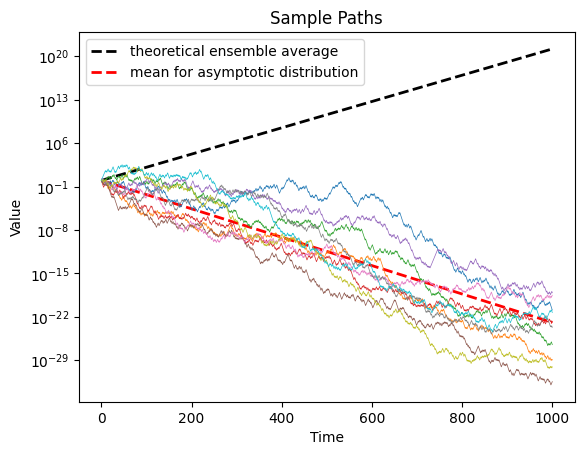

In [39]:
n_samples = 10
n_steps = 1000

paths = simulation(n_samples, n_steps, p_up, p_down, r_up, r_down)
avg_path = np.mean(paths, axis=0)

plt.figure()

time = np.arange(1, n_steps+1)
ev_sequence = np.power(ev_r, time)
asymp_sequence = np.exp(asymp_mean*time)

plt.plot(time, ev_sequence, linewidth=2, label=f'theoretical ensemble average', color='black', linestyle='--')
plt.plot(time, asymp_sequence, linewidth=2, label=f'mean for asymptotic distribution', color='red', linestyle='--')

for row in paths:
    plt.plot(row, linewidth=0.5)


# Add labels and a legend
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sample Paths')
plt.legend()


# Show the plot
plt.show()